In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
import librosa
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
import tensorflow as tf
from sklearn.metrics import classification_report



import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, roc_curve, accuracy_score, plot_confusion_matrix

import missingno as msno
from matplotlib import pyplot as plt

import imp
from nltk.util import ngrams
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,LayerNormalization,BatchNormalization,Dropout,Conv1D,MaxPooling1D,GlobalMaxPooling1D,GlobalAveragePooling1D,Activation,Input,concatenate,Reshape



from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
import tensorflow as tf


from scipy import interpolate
import librosa

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from tensorflow.keras.preprocessing.text import Tokenizer

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf

import imp
from nltk.util import ngrams
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,Permute

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from datasets import load_dataset

In [2]:
emotions = load_dataset('emotion')

emotions.set_format('pandas')
df = emotions['train'][:]
df.head()

def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [3]:
text_list_p=df["text"].tolist()
labels_p=df["label_name"].tolist()

text_list=[]
labels=[]
for i in range(len(labels_p)):
    if text_list_p[i]!='':
        text_list.append(text_list_p[i])
        labels.append(labels_p[i])

labels=np.array(labels)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
num_classes=int(np.max(integer_encoded)+1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(num_classes, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)



# randomly create indices for train and test
indices = np.arange(len(text_list))
np.random.shuffle(indices)
splitter=0.6
train_indices = indices[:int(splitter*len(text_list))]
test_indices = indices[int(splitter*len(text_list)):]
text_list_train = np.array(text_list)[train_indices]
text_list_test = np.array(text_list)[test_indices]
labels_train = np.array(labels)[train_indices]
labels_test = np.array(labels)[test_indices]
onehot_encoded_train = np.array(onehot_encoded)[train_indices]
onehot_encoded_test = np.array(onehot_encoded)[test_indices]
integer_encoded_train = np.array(integer_encoded)[train_indices]
integer_encoded_test = np.array(integer_encoded)[test_indices]




# doing for text_list_train
omega_text_words_train = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
for i in range(len(text_list_train)):
    sentence=text_list_train[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words_train.append(flat_list)


# doing for text_list_test
omega_text_words_test = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
for i in range(len(text_list_test)):
    sentence=text_list_test[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words_test.append(flat_list)


# doing for text_list
omega_text_words = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

 anger  -----------------------------  [1. 0. 0. 0. 0. 0.]
 fear  -----------------------------  [0. 1. 0. 0. 0. 0.]
 joy  -----------------------------  [0. 0. 1. 0. 0. 0.]
 love  -----------------------------  [0. 0. 0. 1. 0. 0.]
 sadness  -----------------------------  [0. 0. 0. 0. 1. 0.]
 surprise  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [4]:
t = time()
w2v_model=Word2Vec(sentences=omega_text_words,vector_size=50,window=4,min_count=1,workers=cores-1,epochs=60,sg=1) #sh=1->Skip-gram,0->CBOW

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

#As we do not plan to train the model any further, we are calling init_sims(), which will make the model much more memory-efficient:
w2v_model.init_sims(replace=True)

Time to train the model: 0.17 mins


ref_embedding_train.shape:  (9600, 66, 50)
ref_embedding_test.shape:  (6400, 64, 50)


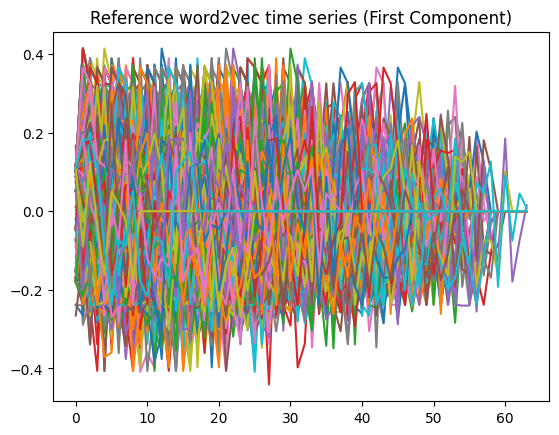

In [5]:
# getting word2vec embedding for train
ref_embedding_train=np.zeros((len(integer_encoded_train),max([len(i) for i in omega_text_words_train]),50))
for i in range(ref_embedding_train.shape[0]):
    sent=omega_text_words_train[i]
    for j in range(len(sent)):
        ref_embedding_train[i,j,:]=w2v_model.wv[omega_text_words_train[i][j]]


# getting word2vec embedding for test
ref_embedding_test=np.zeros((len(integer_encoded_test),max([len(i) for i in omega_text_words_test]),50))
for i in range(ref_embedding_test.shape[0]):
    sent=omega_text_words_test[i]
    for j in range(len(sent)):
        ref_embedding_test[i,j,:]=w2v_model.wv[omega_text_words_test[i][j]]


print("ref_embedding_train.shape: ",ref_embedding_train.shape)
print("ref_embedding_test.shape: ",ref_embedding_test.shape)


plt.figure()
for i in range(len(ref_embedding_test)):
    plt.plot(ref_embedding_test[i,:,0])
    plt.title("Reference word2vec time series (First Component)")     

In [6]:
from tabnanny import verbose
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler



# creating a tokenizer
t=Tokenizer()
t.fit_on_texts(text_list)
vocab_size = len(t.word_index) + 1




X_encoded_train= t.texts_to_sequences(text_list_train)
X_encoded_test= t.texts_to_sequences(text_list_test)

max_len=max(len(l) for l in X_encoded_train)
print("Maximum  Time series Size in Train Texts:", max_len)

X_train=pad_sequences(X_encoded_train,maxlen=max_len,padding='post')
X_test=pad_sequences(X_encoded_test,maxlen=max_len,padding='post')

y_train=onehot_encoded_train
y_test=onehot_encoded_test


base_size=50
embedding_matrix=np.zeros((vocab_size,base_size))


for word,i in t.word_index.items():
    temp=w2v_model.wv[word]
    if temp is not None:
        embedding_matrix[i]=temp

red_size=base_size
#-----------------------Autoencoder Compression-----------------------#
red_size = 25
random_state = 0
scaler=MinMaxScaler()
# emb_mat1=scaler.fit_transform(embedding_matrix)
emb_mat1=embedding_matrix
acti='relu'
acti_en='tanh'
input_vec = keras.Input(shape=(base_size,))
x = layers.Dense(red_size*4, activation=acti)(input_vec)
x= layers.Dense(red_size*2, activation=acti)(x)
encoded = layers.Dense(red_size, activation=acti_en,name='subversion')(x)
decoded = layers.Dense(red_size*2, activation=acti)(encoded)
decoded = layers.Dense(red_size*4, activation=acti)(decoded)
decoded = layers.Dense(base_size, activation='linear')(decoded)
autoencoder = keras.Model(input_vec, decoded)
autoencoder.compile(optimizer=Adam(lr=1e-4), loss='mse')

autoencoder.fit(emb_mat1, emb_mat1,
                epochs=20,shuffle=True,verbose=1,validation_split=0.2)


encoder = keras.Model(input_vec, encoded)
embedding_matrix=encoder.predict(emb_mat1)


#-----------------------Neural Embedding (Supervised now unlinke previous)-----------------------#

very_red_size=red_size
model=Sequential()
model.add(Embedding(vocab_size,red_size,weights=[embedding_matrix],input_length=max_len,trainable=True,name='embedder'))
# model.add(LayerNormalization())
# model.add(Dense(very_red_size,activation='linear',name='getter'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))
model.compile(optimizer=Adam(lr=1e-3),loss='categorical_crossentropy',metrics=['acc'])
model.summary()
history=model.fit(X_train,y_train,epochs=40,verbose=2,batch_size=32,validation_data=(X_test,y_test))

Maximum  Time series Size in Train Texts: 66
Epoch 1/20
381/381 [==============================] - 3s 5ms/step - loss: 0.0140 - val_loss: 0.0092
Epoch 2/20
381/381 [==============================] - 2s 4ms/step - loss: 0.0101 - val_loss: 0.0071
Epoch 3/20
381/381 [==============================] - 2s 4ms/step - loss: 0.0082 - val_loss: 0.0057
Epoch 4/20
381/381 [==============================] - 1s 4ms/step - loss: 0.0070 - val_loss: 0.0049
Epoch 5/20
381/381 [==============================] - 1s 4ms/step - loss: 0.0062 - val_loss: 0.0044
Epoch 6/20
381/381 [==============================] - 1s 4ms/step - loss: 0.0057 - val_loss: 0.0041
Epoch 7/20
381/381 [==============================] - 1s 4ms/step - loss: 0.0054 - val_loss: 0.0038
Epoch 8/20
381/381 [==============================] - 1s 3ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 9/20
381/381 [==============================] - 1s 3ms/step - loss: 0.0049 - val_loss: 0.0035
Epoch 10/20
381/381 [==============================] - 

In [7]:
layer_output=model.get_layer('embedder').output
intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)
intermediate_prediction_train=intermediate_model.predict(X_train)
scaler=100.0
rough_timeseries_train=scaler*intermediate_prediction_train
print("Train rough time series shape: ",rough_timeseries_train.shape)


intermediate_prediction_test=intermediate_model.predict(X_test)
scaler=100.0
rough_timeseries_test=scaler*intermediate_prediction_test
print("Test rough time series shape: ",rough_timeseries_test.shape)

300/300 [==============================] - 0s 988us/step
Train rough time series shape:  (9600, 66, 25)
200/200 [==============================] - 0s 814us/step
Test rough time series shape:  (6400, 66, 25)


In [8]:
max_size=max([len(i) for i in omega_text_words])

# TRAIN 

time_stretched_train=np.zeros((len(y_train),max_size,very_red_size)) #stretches the vector over zero padding
time_stretched2_train=np.zeros((len(y_train),max_size,very_red_size)) #stretches the vector over zero padding but also stretches 
                                                            # a scalar over whole zero padding

for i in range(len(y_train)):
    data=rough_timeseries_train[i]
    indo=omega_text_words_train[i]
    sub_data=data[:len(omega_text_words_train[i]),:]
    if (len(indo)>1):
        data_stretched=np.zeros((max_size,very_red_size))
        for k in range(data_stretched.shape[1]):
            strectchy=librosa.resample(sub_data[:,k], sub_data.shape[0], max_size)
            data_stretched[:,k]=strectchy[:max_size]

        time_stretched_train[i,:,:]=data_stretched
        time_stretched2_train[i,:,:]=data_stretched

    if (len(indo)==1):
        sub_data_val=sub_data[:,:very_red_size]
        time_stretched_train[i,:sub_data_val.shape[0],:]=sub_data_val

        data_stretched=np.zeros((max_size,very_red_size))

        for k in range(data_stretched.shape[1]):
            stretchy=librosa.core.resample(sub_data_val[:,k], sub_data_val.shape[0], max_size)
            data_stretched[:,k]=strectchy[:max_size]

        time_stretched2_train[i,:,:]=data_stretched


# TEST

time_stretched_test=np.zeros((len(y_test),max_size,very_red_size)) #stretches the vector over zero padding
time_stretched2_test=np.zeros((len(y_test),max_size,very_red_size)) #stretches the vector over zero padding but also stretches

for i in range(len(y_test)):
    data=rough_timeseries_test[i]
    indo=omega_text_words_test[i]
    sub_data=data[:len(omega_text_words_test[i]),:]
    if (len(indo)>1):
        data_stretched=np.zeros((max_size,very_red_size))
        for k in range(data_stretched.shape[1]):
            strectchy=librosa.core.resample(sub_data[:,k], sub_data.shape[0], max_size)
            data_stretched[:,k]=strectchy[:max_size]

        time_stretched_test[i,:,:]=data_stretched
        time_stretched2_test[i,:,:]=data_stretched

    if (len(indo)==1):
        sub_data_val=sub_data[:,:very_red_size]
        time_stretched_test[i,:sub_data_val.shape[0],:]=sub_data_val

        data_stretched=np.zeros((max_size,very_red_size))

        for k in range(data_stretched.shape[1]):
            stretchy=librosa.core.resample(sub_data_val[:,k], sub_data_val.shape[0], max_size)
            data_stretched[:,k]=strectchy[:max_size]

        time_stretched2_test[i,:,:]=data_stretched


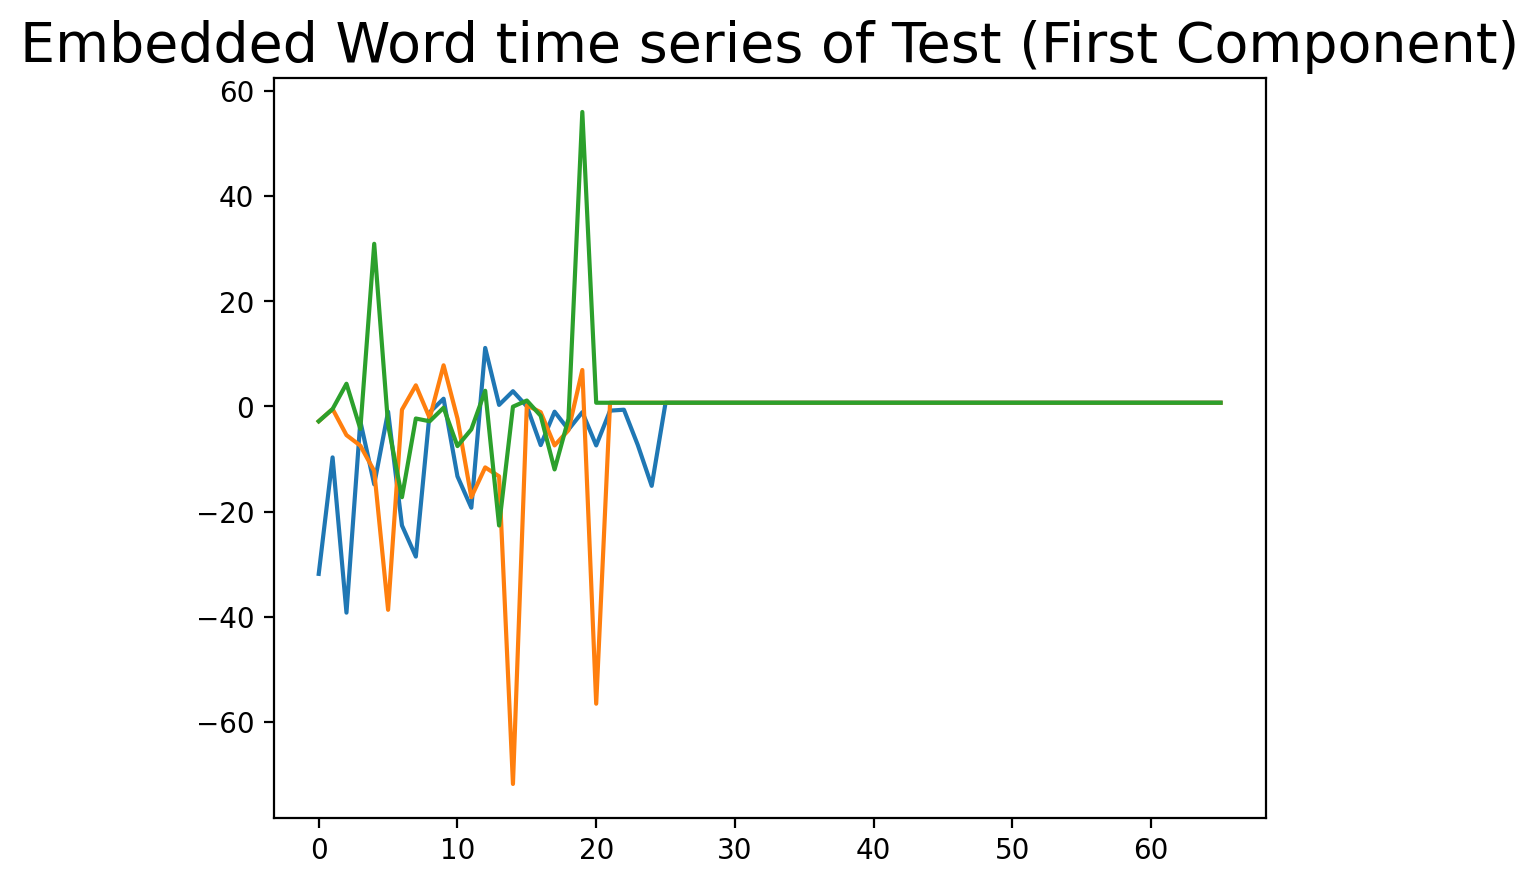

In [9]:
plt.figure(dpi=200)
for i in [3,4,5]:
    plt.plot(rough_timeseries_test[i,:,0])
    plt.title("Embedded Word time series of Test (First Component)", fontsize=20)

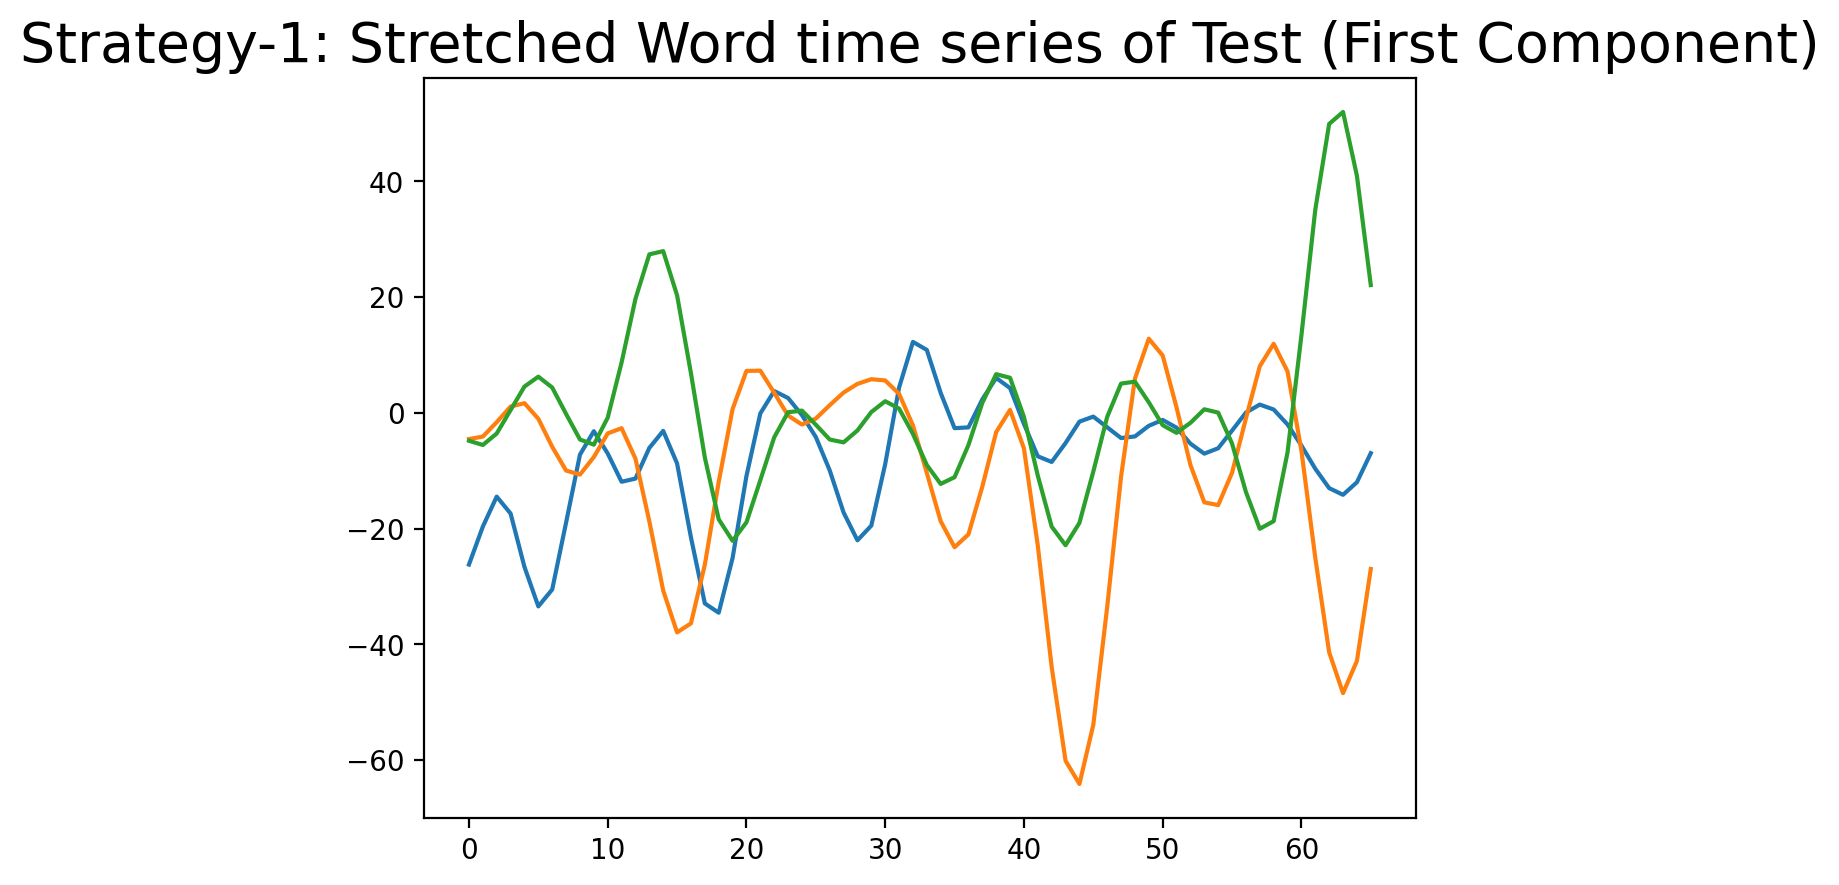

In [10]:
plt.figure(dpi=200)
for i in [3,4,5]:
    plt.plot(time_stretched_test[i,:,0])
    plt.title("Strategy-1: Stretched Word time series of Test (First Component)", fontsize=20)

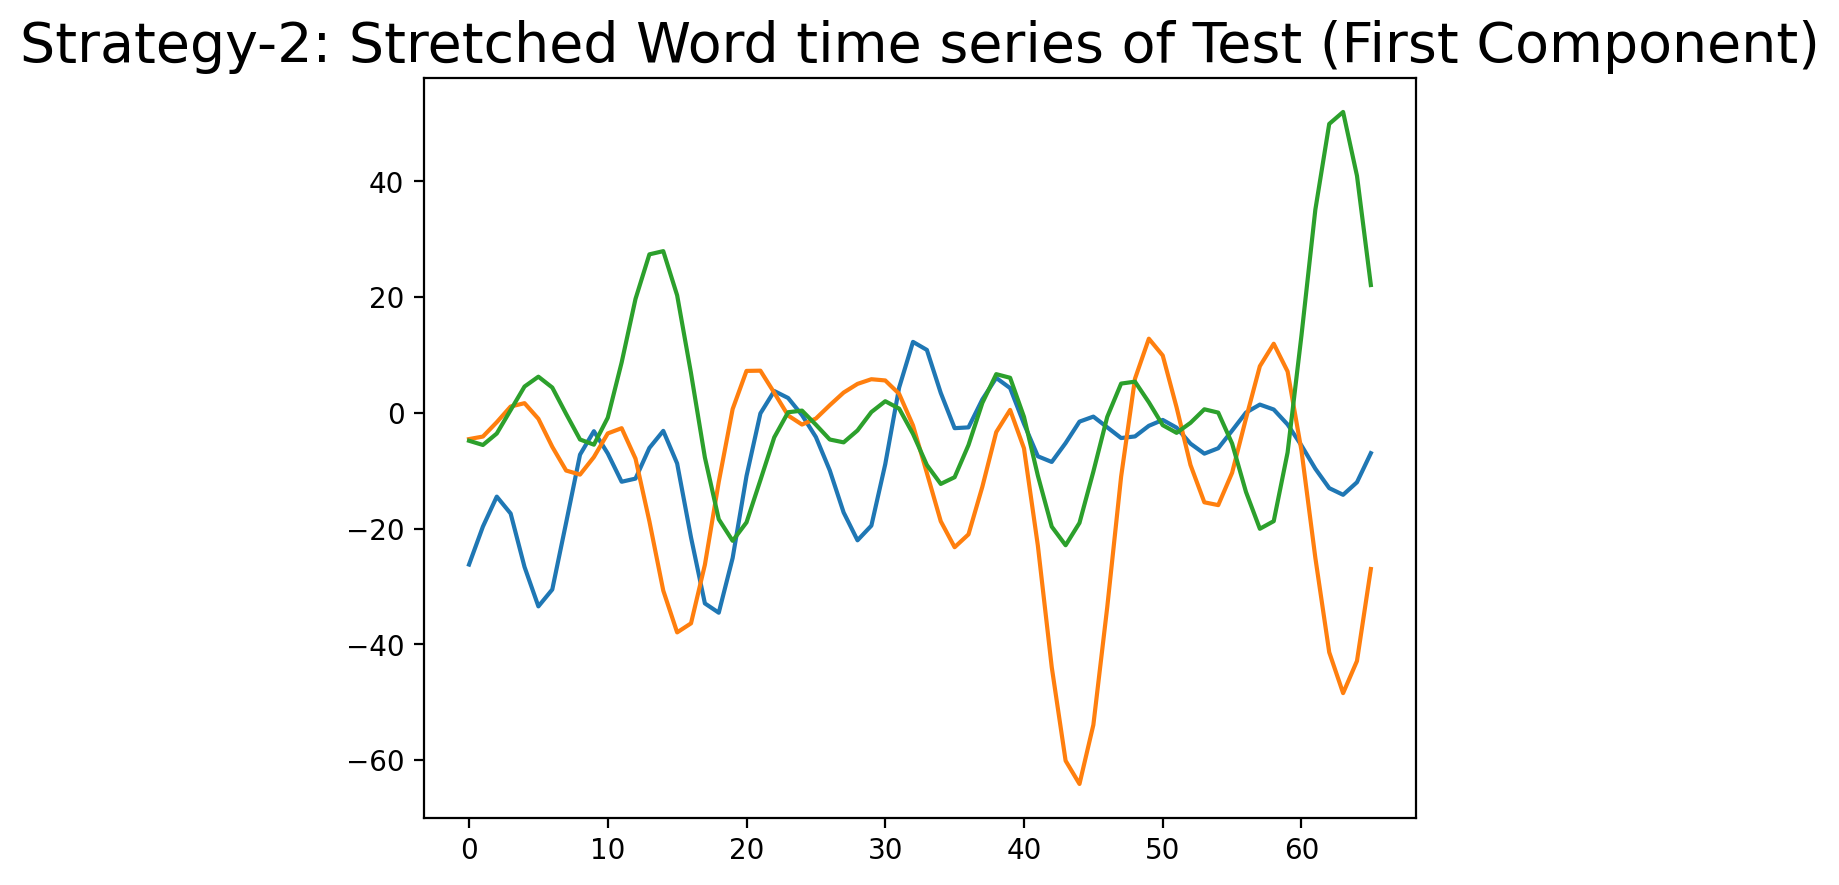

In [11]:
plt.figure(dpi=200)
for i in [3,4,5]:
    plt.plot(time_stretched2_test[i,:,0])
    plt.title("Strategy-2: Stretched Word time series of Test (First Component)", fontsize=20)

In [12]:
time_stretched_train=time_stretched2_train+rough_timeseries_train
time_stretched_test=time_stretched2_test+rough_timeseries_test

In [13]:
print("Train Signal Features Shape: ",time_stretched2_train.shape)
print("Test Signal Features Shape: ",time_stretched2_test.shape)

Train Signal Features Shape:  (9600, 66, 25)
Test Signal Features Shape:  (6400, 66, 25)


In [17]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


# define keras model
def create_model():
    inputs = layers.Input(shape=(max_size,very_red_size))
    head_size = 66
    num_heads = 3
    ff_dim = 32
    num_transformer_blocks = 3
    dropout = 0.2

    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    # x = layers.Dropout(dropout)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(20, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    # x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


model = create_model()
model.summary()
model.fit(time_stretched2_train, y_train, epochs=2, verbose=2,validation_data=(time_stretched2_test,y_test))


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 66, 25)]     0           []                               
                                                                                                  
 layer_normalization_6 (LayerNo  (None, 66, 25)      50          ['input_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_3 (MultiH  (None, 66, 25)      20419       ['layer_normalization_6[0][0]',  
 eadAttention)                                                    'layer_normalization_6[0][0]']  
                                                                                            

200/200 [==============================] - 2s 6ms/step


<Axes: >

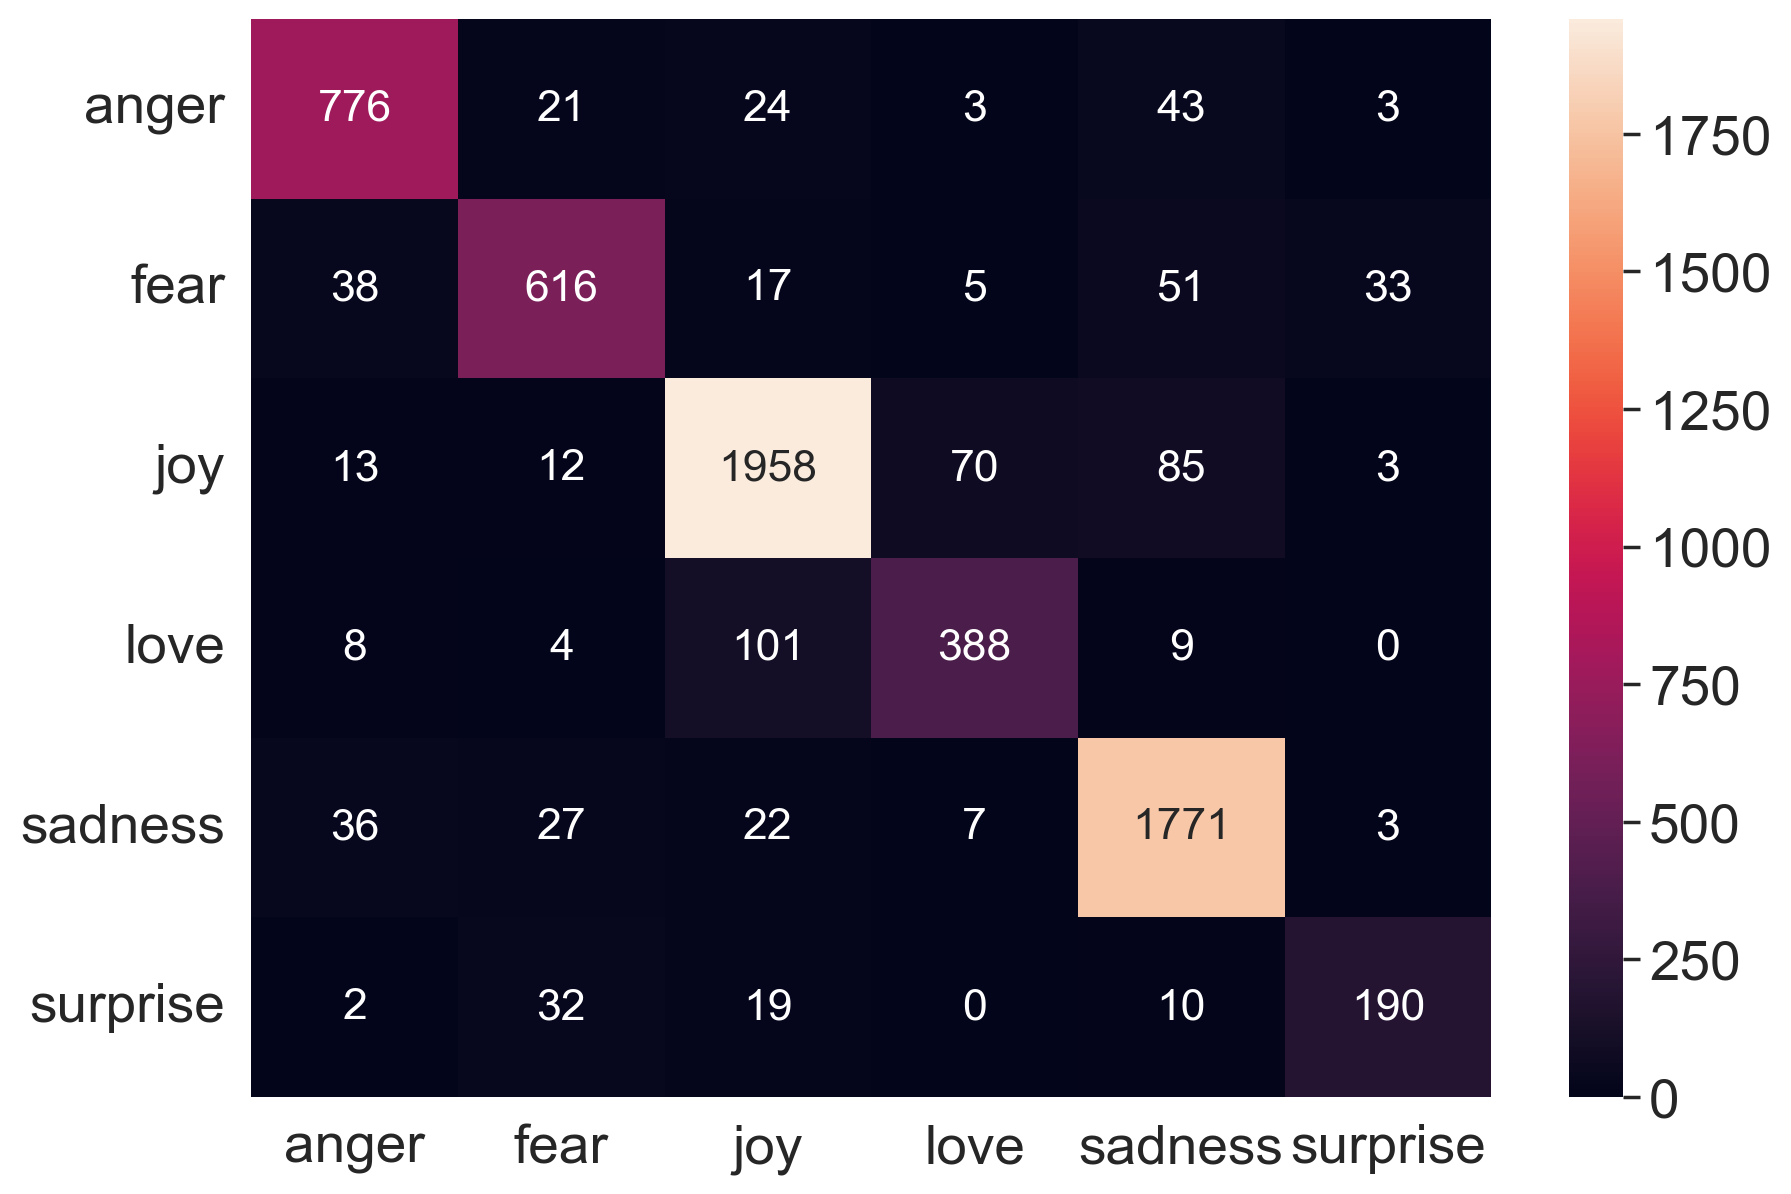

In [18]:
ref=np.argmax(y_test,axis=1)
predictions=np.argmax(model.predict(time_stretched2_test),axis=1)
cm=confusion_matrix(ref,predictions)


label_names=[]
for key,_ in mapping.items():
    label_names.append(key)

    
#plot confusion matrix

df_cm = pd.DataFrame(cm, label_names,label_names)
plt.figure(figsize = (10,7),dpi=200)
sn.set(font_scale=1.8)  # Increase the font size for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='d') # font size

In [19]:
print(classification_report(ref, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8889    0.8920    0.8904       870
           1     0.8652    0.8105    0.8370       760
           2     0.9145    0.9145    0.9145      2141
           3     0.8203    0.7608    0.7894       510
           4     0.8994    0.9491    0.9236      1866
           5     0.8190    0.7510    0.7835       253

    accuracy                         0.8905      6400
   macro avg     0.8679    0.8463    0.8564      6400
weighted avg     0.8895    0.8905    0.8895      6400

